[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


              precision    recall  f1-score   support

       anger       0.92      0.78      0.84       465
        fear       0.83      0.77      0.80       420
         joy       0.84      0.96      0.89      1199
        love       0.86      0.63      0.72       302
     sadness       0.89      0.94      0.91      1079
    surprise       0.85      0.47      0.61       135

    accuracy                           0.86      3600
   macro avg       0.86      0.76      0.80      3600
weighted avg       0.86      0.86      0.86      3600



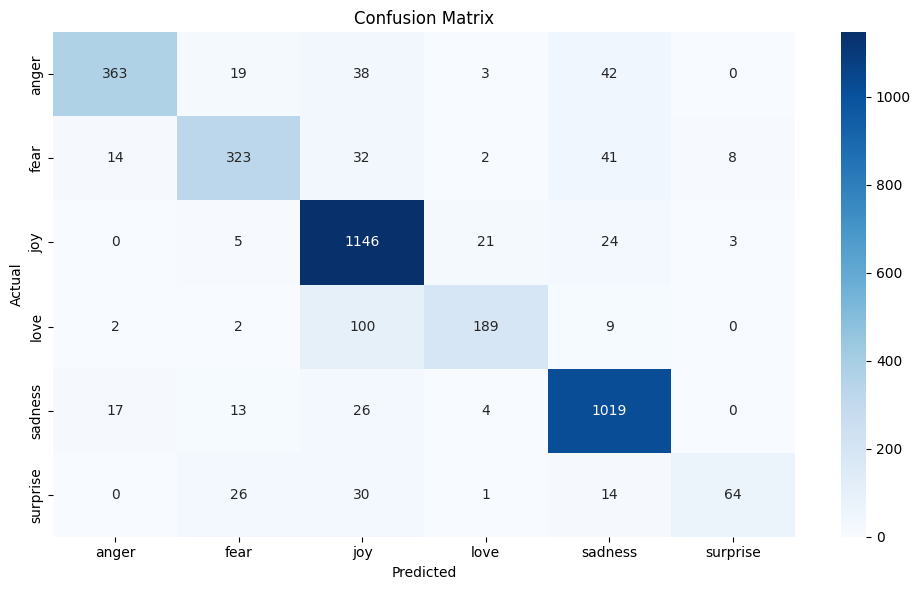

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import ipywidgets as widgets
from IPython.display import display, clear_output

# Download
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Load dataset
def load_dataset(path):
    return pd.read_csv(path, sep=";", names=["content", "emotion"])

train_df = load_dataset("train.txt")
test_df = load_dataset("test.txt")
df = pd.concat([train_df, test_df], ignore_index=True)

# Preprocessing
def clean_text(text):
    text = text.lower()
    replacements = {
        ":c": "sad",
        ":'(": "crying",
        ":)": "smile",
        "xd": "laugh",
        ":/": "confused",
        "💔": "broken",
        "❤️": "love"
    }
    for symbol, word in replacements.items():
        text = text.replace(symbol, word)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

df['content'] = df['content'].apply(clean_text)

# Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['content'])
y = df['emotion']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
model = LogisticRegression(max_iter=300)
model.fit(X_train, y_train)

# Test
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d",
            xticklabels=model.classes_, yticklabels=model.classes_, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [25]:
# Prediction
def detect_emotion(text_input):
    text_input = clean_text(text_input)
    vector = vectorizer.transform([text_input])
    prediction = model.predict(vector)[0]
    return prediction

# testing
text_box = widgets.Text(
    value='Hello World',
    placeholder='Type in English please',
    description='Text:',
    layout=widgets.Layout(width='80%'),
    disabled=False
)

button = widgets.Button(description="Detect Emotion", button_style='success')

def on_button_clicked(b):
    clear_output(wait=True)
    display(text_box, button)
    result = detect_emotion(text_box.value)
    print(f"Emotion: {result}")

button.on_click(on_button_clicked)

display(text_box, button)


Text(value='Hello World', description='Text:', layout=Layout(width='80%'), placeholder='Type in English please…

Button(button_style='success', description='Detect Emotion', style=ButtonStyle())